# Package

In [28]:
# PyTorch package and submodules
import torch
import torch.nn as nn
from torch.optim import SGD #gradient descent optimizer

# NumPy for math operations, and Pandas for processing tabular data.
import numpy as np
import pandas as pd

# Plotly plotting package
import plotly.graph_objects as go
import plotly.express as px

# Import matplotlib.pyplot to visualize tree models
import matplotlib.pyplot as plt

# Use imbalanced learn package
from imblearn.over_sampling import SMOTE

from genetic_selection import GeneticSelectionCV

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, precision_score, recall_score


from sklearn.model_selection import StratifiedKFold, train_test_split as tts, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier as DTC, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier as XGBC
import seaborn as sns
from sklearn.feature_selection import SequentialFeatureSelector as SFS

In [29]:
# Draw matrix fig using seaborn
def matrix_fig(title,y,yp):
  cm = confusion_matrix(y, yp)
  mtfig = sns.heatmap (cm, annot=True, fmt="d",cmap="YlGnBu", xticklabels=['0-12 hrs', '12-24 hrs', '>24 hrs'], yticklabels=['0-12 hrs', '12-24 hrs', '>24 hrs'])
  mtfig.set_title(title)
  mtfig.set_ylabel('True label')
  mtfig.set_xlabel('Predicted label')

  
# Evaluation of models
from sklearn.metrics import confusion_matrix
def evaluation(title, y_test, y_pred):
    target_map = {'0-12 hours': 0, '12-24 hrs': 1, '>24 hrs': 2}
    target_names = list(target_map.keys())
    cm = confusion_matrix(y_test, y_pred)
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for i in range(3):
        precision_score = cm[i,i] / sum(cm[:,i])
        recall_score = cm[i,i] / sum(cm[i,:])
        f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
        precision_scores.append(precision_score)
        recall_scores.append(recall_score)
        f1_scores.append(f1_score)
        print(f"Precision_score for class {target_names[i]}: {round(precision_score, 4)}")
        print(f"Recall_score for class {target_names[i]}: {round(recall_score, 4)}")
        print(f"F1_score for class {target_names[i]}: {round(f1_score, 4)}")
    accuracy = sum([cm[i,i] for i in range(3)]) / sum(sum(cm))
    print(f"{title}_Accuracy: {round(accuracy, 4)}")
    
    x = [f"Precision_{target_names[i]}" for i in range(3)] + [f"Recall_{target_names[i]}" for i in range(3)] + [f"F1_{target_names[i]}" for i in range(3)] + ["Accuracy"]
    y = precision_scores + recall_scores + f1_scores + [accuracy]
    fig, ax = plt.subplots()
    #dpi=500
    ax.bar(x, y)
    ax.set_xticklabels(x, rotation=90)
    ax.set_xlabel('Param')
    ax.set_ylabel('Score')
    ax.set_title(title)
    for a,b in zip(x,y):
        plt.text(a,b +0.01, '%.3f' %b, ha='center', va='bottom', fontsize=7)
    plt.show()


def predict_evaluation(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    MCC = matthews_corrcoef(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    fscore = f1_score(y_test, y_pred, average='macro')
    result={'accuracy':accuracy,
            'MCC':MCC,
            'precision':precision,
            'recall':recall,
            'fscore':fscore}
    return result

In [30]:
def roc_auc_fig(title, y_test, y_pred, n_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test.values, y_pred[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure(figsize=(8,6))
    colors = ['blue', 'red', 'green']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title + ' Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


# Import Data

In [31]:
df = pd.read_csv("/Users/Siqi/Desktop/SPH6004/Group/3Step_1Line.csv")

In [32]:
df.head()

,Unnamed: 0,vent_duration,stay_id,calcium_48,creatinine_48,glucose_48,sodium_48,chloride_48,hemoglobin_48,wbc_48,...,glucose+24,sodium+24,chloride+24,hemoglobin+24,wbc+24,alt+24,ast+24,alp+24,bilirubin_total+24,pt+24
0,0,2.000000,37607624,9.1,0.6,145.0,145.0,103.0,7.6,1.7,...,79.5,145.0,104.0,7.15,1.50,21.0,21.0,72.0,0.50,12.20
1,1,4.000000,30515259,8.5,2.6,109.0,134.0,94.0,7.1,2.2,...,198.0,140.0,104.0,7.90,7.80,168.0,330.5,39.0,3.65,18.85
2,2,16.000000,33572547,8.2,1.4,100.0,139.0,111.0,8.5,0.1,...,142.0,134.0,106.0,9.00,0.10,13.0,25.0,77.0,1.20,14.30
3,3,15.000000,34776632,9.5,0.7,143.0,131.0,88.0,7.7,9.6,...,117.5,148.0,106.0,8.75,12.95,75.0,275.5,171.0,33.20,37.60
4,4,104.133333,36606626,8.7,0.7,107.0,143.0,113.0,8.1,2.8,...,85.0,141.0,109.0,9.40,3.70,17.0,20.0,78.0,1.40,12.40


In [33]:
# create a function to label the vent_duration as hours
def label_hours(x):
    if x <= 12:
        return '0-12 hours'
    elif x <= 24:
        return '12-24 hrs'
    else:
        return '>24 hrs'
df['vent_hours'] = df['vent_duration'].apply(label_hours)
df = df.drop(['Unnamed: 0', 'vent_duration','stay_id'], axis=1)

In [34]:
df.head()

,calcium_48,creatinine_48,glucose_48,sodium_48,chloride_48,hemoglobin_48,wbc_48,alt_48,ast_48,alp_48,...,sodium+24,chloride+24,hemoglobin+24,wbc+24,alt+24,ast+24,alp+24,bilirubin_total+24,pt+24,vent_hours
0,9.1,0.6,145.0,145.0,103.0,7.6,1.7,19.0,25.0,67.0,...,145.0,104.0,7.15,1.50,21.0,21.0,72.0,0.50,12.20,0-12 hours
1,8.5,2.6,109.0,134.0,94.0,7.1,2.2,34.0,39.0,216.0,...,140.0,104.0,7.90,7.80,168.0,330.5,39.0,3.65,18.85,0-12 hours
2,8.2,1.4,100.0,139.0,111.0,8.5,0.1,13.0,18.0,69.0,...,134.0,106.0,9.00,0.10,13.0,25.0,77.0,1.20,14.30,12-24 hrs
3,9.5,0.7,143.0,131.0,88.0,7.7,9.6,69.0,263.0,178.0,...,148.0,106.0,8.75,12.95,75.0,275.5,171.0,33.20,37.60,12-24 hrs
4,8.7,0.7,107.0,143.0,113.0,8.1,2.8,17.0,20.0,78.0,...,141.0,109.0,9.40,3.70,17.0,20.0,78.0,1.40,12.40,>24 hrs


In [35]:
feature_columns = df.columns[~df.columns.isin(['vent_hours'])]
target_column = df['vent_hours']

for i in feature_columns:
  df[i] = pd.to_numeric(df[i])

#df.replace({'outcome': {'False': 0, 'True': 1}})
#df['gender'].replace(to_replace = 'M', value = 1, inplace = True)

df.head()
#df.info()
#df.shape

,calcium_48,creatinine_48,glucose_48,sodium_48,chloride_48,hemoglobin_48,wbc_48,alt_48,ast_48,alp_48,...,sodium+24,chloride+24,hemoglobin+24,wbc+24,alt+24,ast+24,alp+24,bilirubin_total+24,pt+24,vent_hours
0,9.1,0.6,145.0,145.0,103.0,7.6,1.7,19.0,25.0,67.0,...,145.0,104.0,7.15,1.50,21.0,21.0,72.0,0.50,12.20,0-12 hours
1,8.5,2.6,109.0,134.0,94.0,7.1,2.2,34.0,39.0,216.0,...,140.0,104.0,7.90,7.80,168.0,330.5,39.0,3.65,18.85,0-12 hours
2,8.2,1.4,100.0,139.0,111.0,8.5,0.1,13.0,18.0,69.0,...,134.0,106.0,9.00,0.10,13.0,25.0,77.0,1.20,14.30,12-24 hrs
3,9.5,0.7,143.0,131.0,88.0,7.7,9.6,69.0,263.0,178.0,...,148.0,106.0,8.75,12.95,75.0,275.5,171.0,33.20,37.60,12-24 hrs
4,8.7,0.7,107.0,143.0,113.0,8.1,2.8,17.0,20.0,78.0,...,141.0,109.0,9.40,3.70,17.0,20.0,78.0,1.40,12.40,>24 hrs


# Feature Selection & TTS

In [38]:
# corr_matrix=df_norm.corr().abs()
# upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
# to_drop=[column for column in upper_triangle.columns if any(upper_triangle[column]>0.80)]
# data_select1=data_norm.drop(to_drop, axis=1)


# selector=VarianceThreshold(0)
# selector.fit(data_select1)
# selected_features=selector.get_support(indices=True)
# selected_column_names=data_select1.columns[selected_features].tolist()
# data_select2=data_select1[selected_column_names]

In [39]:
target_map = {'0-12 hours': 0, '12-24 hrs': 1, '>24 hrs': 2}


X_raw = df.columns[~df.columns.isin(['vent_hours','vent_duration','stay_id'])]
Y_raw = df['vent_hours'].map(target_map)   
##df['vent_hours'].map(target_map)


# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# Y_raw = le.fit_transform(Y_raw)

# # Check data balance 
# print("0-12 hours:", len(Y_raw[Y_raw=='0-12 hour']))
# print("12-24 hrs:", len(Y_raw[Y_raw == '12-24 hrs']))
# print(">24 hrs:", len(Y_raw[Y_raw == '>24 hrs']))


vent_hours_counts = df['vent_hours'].value_counts()
print(vent_hours_counts)


>24 hrs       791
0-12 hours    624
12-24 hrs     508
Name: vent_hours, dtype: int64


In [40]:
Xtrain, Xtest, Ytrain, Ytest = tts(df.iloc[:, :-1], Y_raw , test_size=0.2, random_state=1)

In [41]:
Ytrain.value_counts()

2    627
0    505
1    406
Name: vent_hours, dtype: int64

In [42]:
Ytest.value_counts()

2    164
0    119
1    102
Name: vent_hours, dtype: int64

# Logistic regression

              precision    recall  f1-score   support

           0       0.39      0.34      0.36       119
           1       0.00      0.00      0.00       102
           2       0.45      0.78      0.57       164

    accuracy                           0.44       385
   macro avg       0.28      0.37      0.31       385
weighted avg       0.31      0.44      0.36       385

[[ 40   0  79]
 [ 27   0  75]
 [ 36   0 128]]


/Users/Siqi/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/Siqi/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Siqi/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precisi

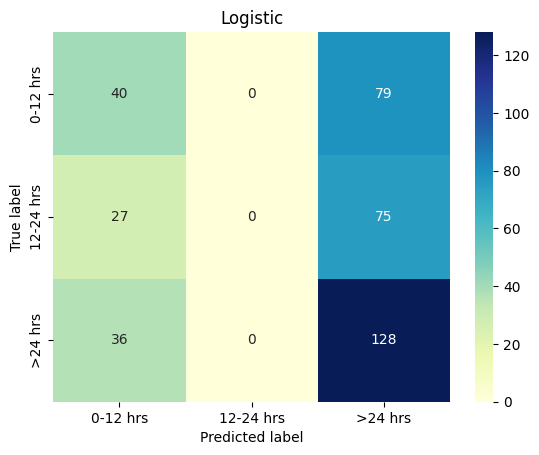

In [43]:
from sklearn.linear_model import LogisticRegression

# Create a multinomial logistic regression model
lreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model on the training data
lreg.fit(Xtrain, Ytrain)

# Make predictions on the test data
predy = lreg.predict(Xtest)

from sklearn.metrics import classification_report
print(classification_report(Ytest, predy))
print (metrics.confusion_matrix(Ytest, predy))
matrix_fig('Logistic' ,Ytest,predy)

In [44]:
result=predict_evaluation(Ytest, predy)
result

/Users/Siqi/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.43636363636363634,
 'MCC': 0.08236105312938471,
 'precision': 0.28075007459432166,
 'recall': 0.3722074195531871,
 'fscore': 0.3114504639168316}

/Users/Siqi/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars
/Users/Siqi/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


Precision_score for class 0-12 hours: 0.3883
Recall_score for class 0-12 hours: 0.3361
F1_score for class 0-12 hours: 0.3604
Precision_score for class 12-24 hrs: nan
Recall_score for class 12-24 hrs: 0.0
F1_score for class 12-24 hrs: nan
Precision_score for class >24 hrs: 0.4539
Recall_score for class >24 hrs: 0.7805
F1_score for class >24 hrs: 0.574
Logistic_Accuracy: 0.4364


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


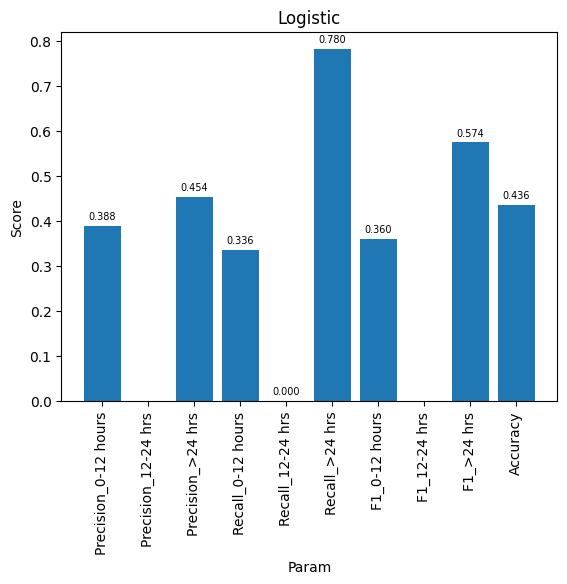

In [45]:
evaluation("Logistic", Ytest, predy)

In [46]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'lbfgs']
}

# Create a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial')

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)

# Train the grid search object on the training data
grid_search.fit(Xtrain, Ytrain)

# Make predictions on the test data using the best model found by the grid search
predy = grid_search.predict(Xtest)

# Print the best parameters found by the grid search
print("Best parameters:", grid_search.best_params_)


/Users/Siqi/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/Siqi/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/Siqi/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/Siqi/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/Siqi/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/Siqi/Library/

Best parameters: {'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'}


/Users/Siqi/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/Siqi/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

In [47]:
best_lreg = grid_search.best_estimator_
best_lreg.fit(Xtrain, Ytrain)

/Users/Siqi/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=10.0, multi_class='multinomial')

/Users/Siqi/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Siqi/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Siqi/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.38      0.27      0.31       119
           1       0.00      0.00      0.00       102
           2       0.45      0.82      0.58       164

    accuracy                           0.43       385
   macro avg       0.28      0.36      0.30       385
weighted avg       0.31      0.43      0.34       385

[[ 32   0  87]
 [ 24   0  78]
 [ 29   0 135]]


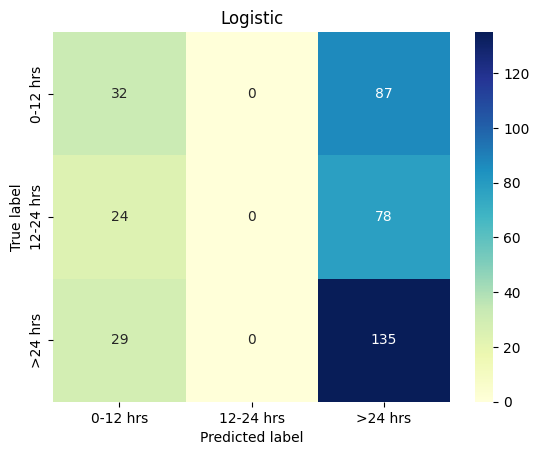

In [48]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, predy))
print (metrics.confusion_matrix(Ytest, predy))
matrix_fig('Logistic' ,Ytest,predy)

In [49]:
result=predict_evaluation(Ytest, predy)
result

/Users/Siqi/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.43376623376623374,
 'MCC': 0.07089038717726266,
 'precision': 0.27549019607843134,
 'recall': 0.3640260982441757,
 'fscore': 0.2985406806400721}

/Users/Siqi/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars
/Users/Siqi/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


Precision_score for class 0-12 hours: 0.3765
Recall_score for class 0-12 hours: 0.2689
F1_score for class 0-12 hours: 0.3137
Precision_score for class 12-24 hrs: nan
Recall_score for class 12-24 hrs: 0.0
F1_score for class 12-24 hrs: nan
Precision_score for class >24 hrs: 0.45
Recall_score for class >24 hrs: 0.8232
F1_score for class >24 hrs: 0.5819
Logistic_Accuracy: 0.4338


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


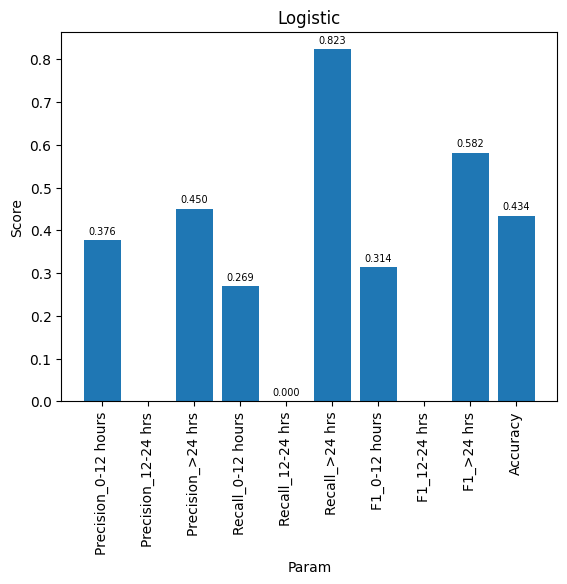

In [50]:
evaluation("Logistic", Ytest, predy)